# Lesson 01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy.stats import norm, cauchy

In [2]:
# plot parameters
import sys
sys.path.append('./../Libraries/')
import plt_params

## Exercise 01.1

**Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site**

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$(see below: Computing statistical uncertainties).

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is: $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$ We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals. A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... but before judging, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

### Solution

In [3]:
# loading the file
data = np.loadtxt('01.1/output.csv', delimiter=',', skiprows=1)

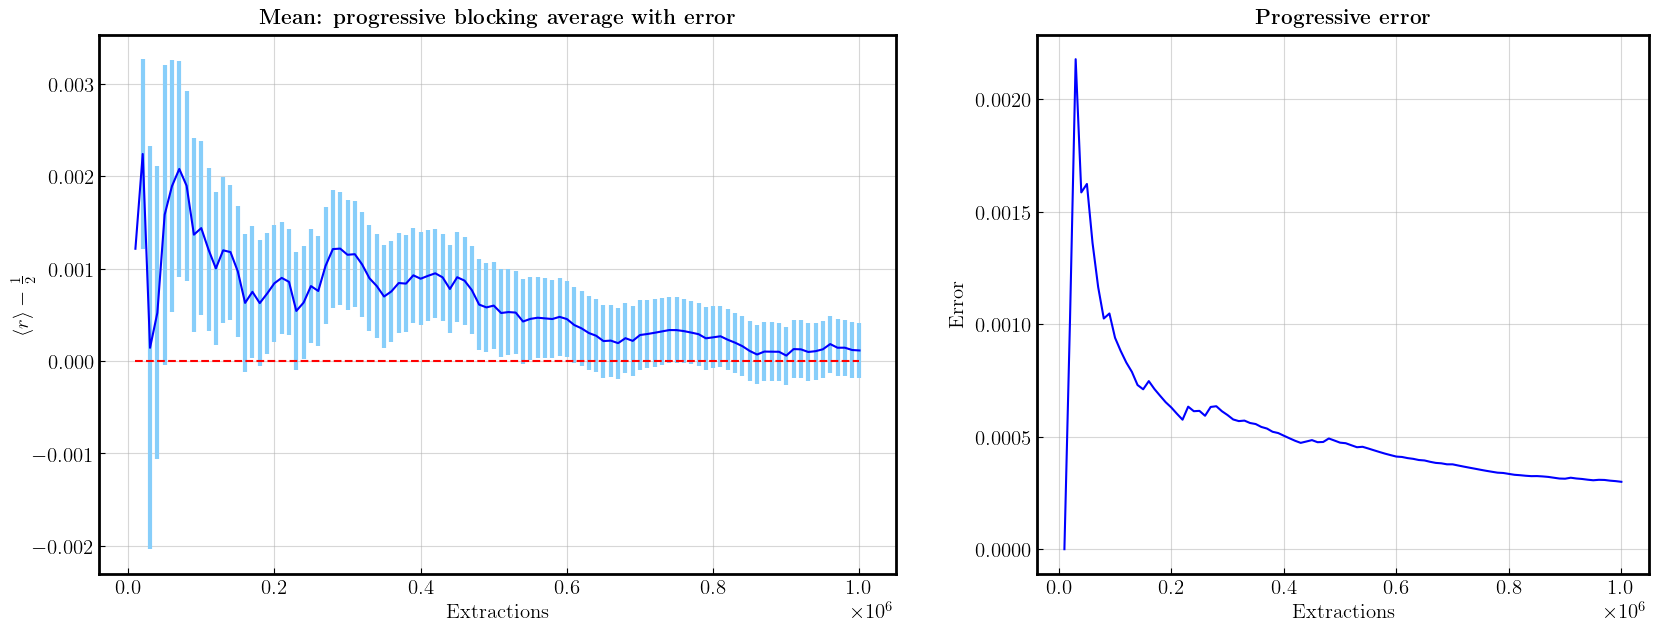

In [4]:
# plot mean
fig, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={'width_ratios': [1.3, 1]})


axs[0].errorbar(data[:,0], data[:,2], yerr=data[:,3], fmt='-', color='blue', ecolor='lightskyblue', elinewidth=3)
zero = np.zeros(data.shape[0])
axs[0].plot(data[:,0], zero, linestyle='--', color='red')

axs[0].set_title(r'\textbf{Mean: progressive blocking average with error}', pad=8)
axs[0].set_xlabel('Extractions')
axs[0].set_ylabel(r'$\langle r \rangle - \frac{1}{2}$', labelpad=-2)

axs[1].plot(data[:,0], data[:,3], color='blue')
axs[1].set_title(r'\textbf{Progressive error}', pad=8)
axs[1].set_xlabel('Extractions')
axs[1].set_ylabel('Error', labelpad=6)

plt.show()

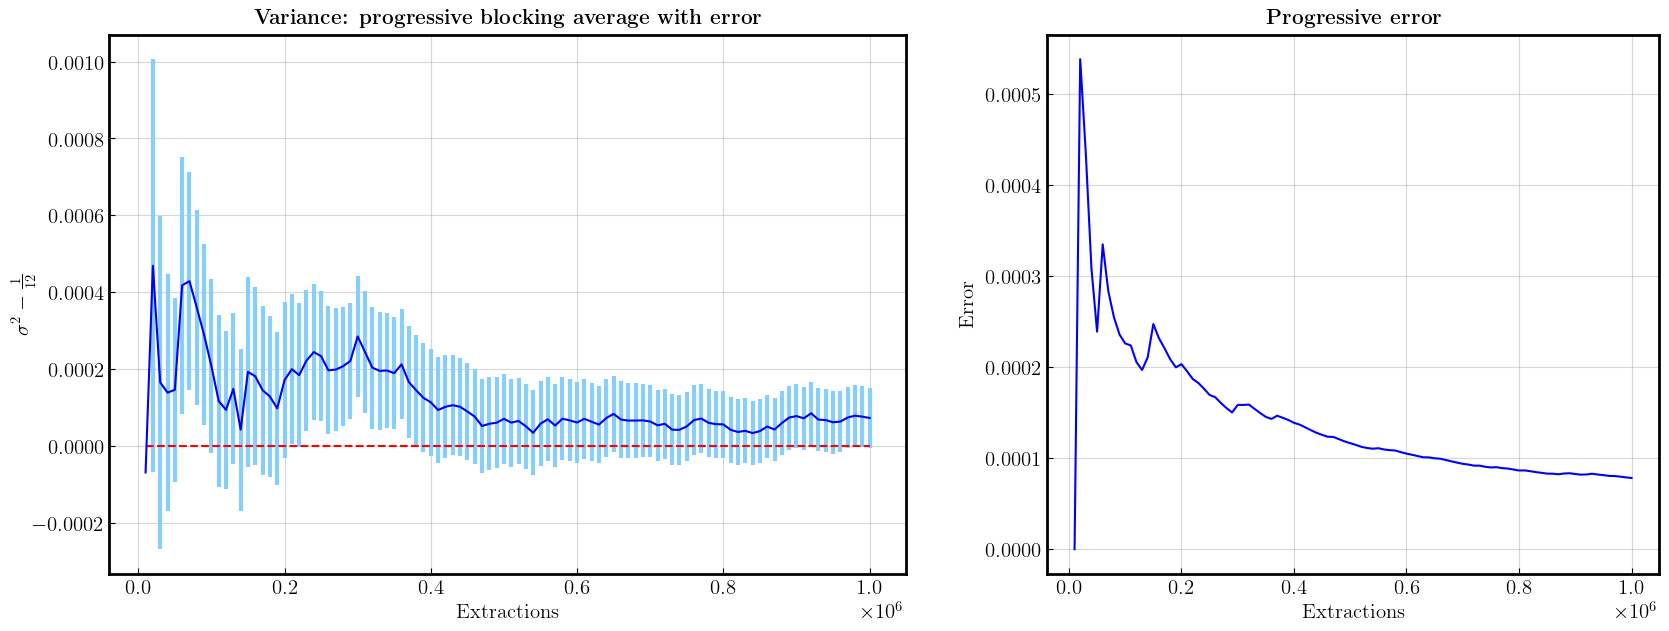

In [5]:
# plot variance
fig, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={'width_ratios': [1.3, 1]})


axs[0].errorbar(data[:,0], data[:,4], yerr=data[:,5], fmt='-', color='blue', ecolor='lightskyblue', elinewidth=3)
zero = np.zeros(data.shape[0])
axs[0].plot(data[:,0], zero, linestyle='--', color='red')

axs[0].set_title(r'\textbf{Variance: progressive blocking average with error}', pad=8)
axs[0].set_xlabel('Extractions')
axs[0].set_ylabel(r'$\sigma^2 - \frac{1}{12}$', labelpad=-2)

axs[1].plot(data[:,0], data[:,5], color='blue')
axs[1].set_title(r'\textbf{Progressive error}', pad=8)
axs[1].set_xlabel('Extractions')
axs[1].set_ylabel('Error', labelpad=6)

plt.show()

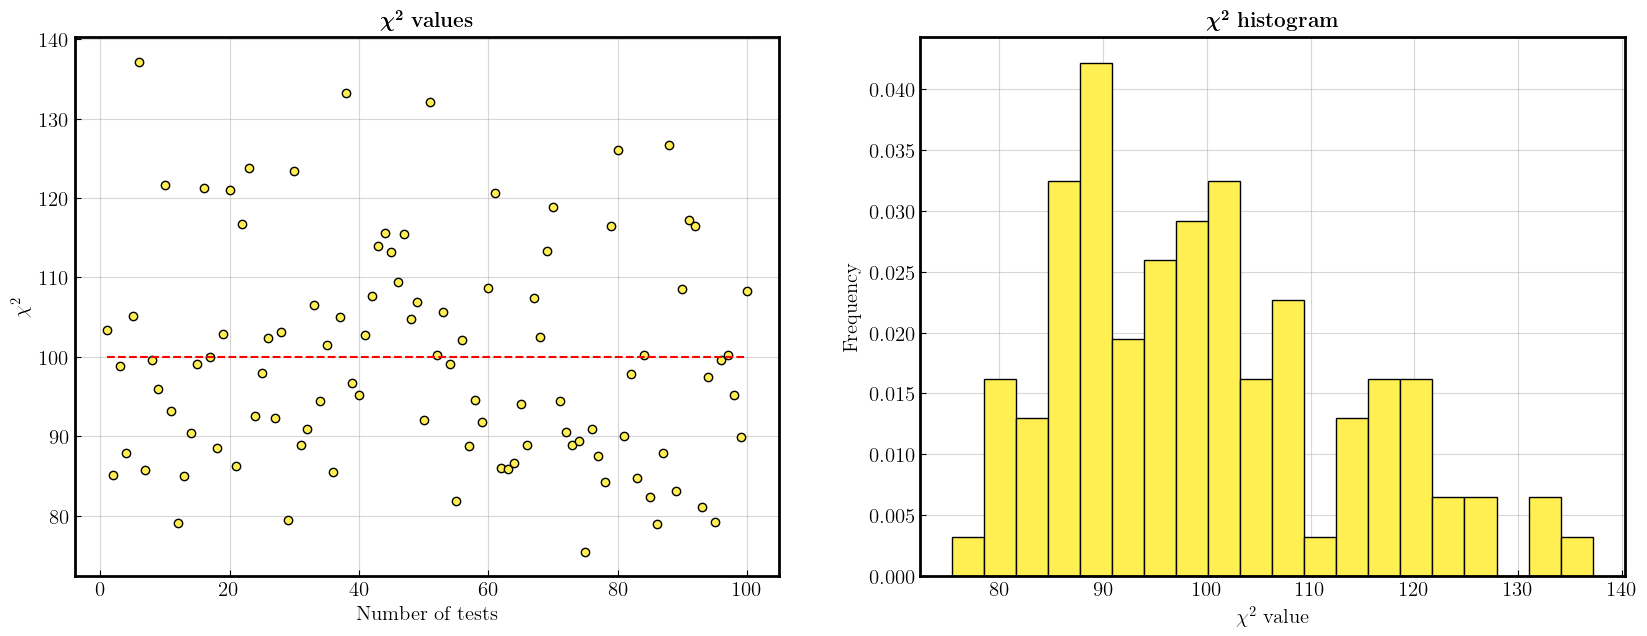

In [6]:
# plot chi2

fig, axs = plt.subplots(1, 2, figsize=(20, 7))

axs[0].scatter(data[:,1], data[:,6], facecolor='#FFEF52')
chi_exp = 100*np.ones(data.shape[0])
axs[0].plot(data[:,1], chi_exp, linestyle='--', color='red')
axs[0].set_title(r'\textbf{\boldmath$\chi^2$ values}', pad=8)
axs[0].set_xlabel('Number of tests')
axs[0].set_ylabel('$\chi^2$', labelpad=6)

axs[1].hist(data[:,6], bins=20, color='#FFEF52', edgecolor='black', density=True)
axs[1].set_title(r'\textbf{\boldmath$\chi^2$ histogram}', pad=8)
axs[1].set_xlabel('$\chi^2$ value')
axs[1].set_ylabel('Frequency', labelpad=6)

plt.show()

## Exercise 01.2

**Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem**

1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. Make 3 picture with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

### Uniform distribution

In [7]:
unif = np.loadtxt('01.2/uniform.csv', delimiter=',', skiprows=1)
unif = unif[np.argsort(unif[:,0])]

In [8]:
# definition of the fiting function

def gauss_distr(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

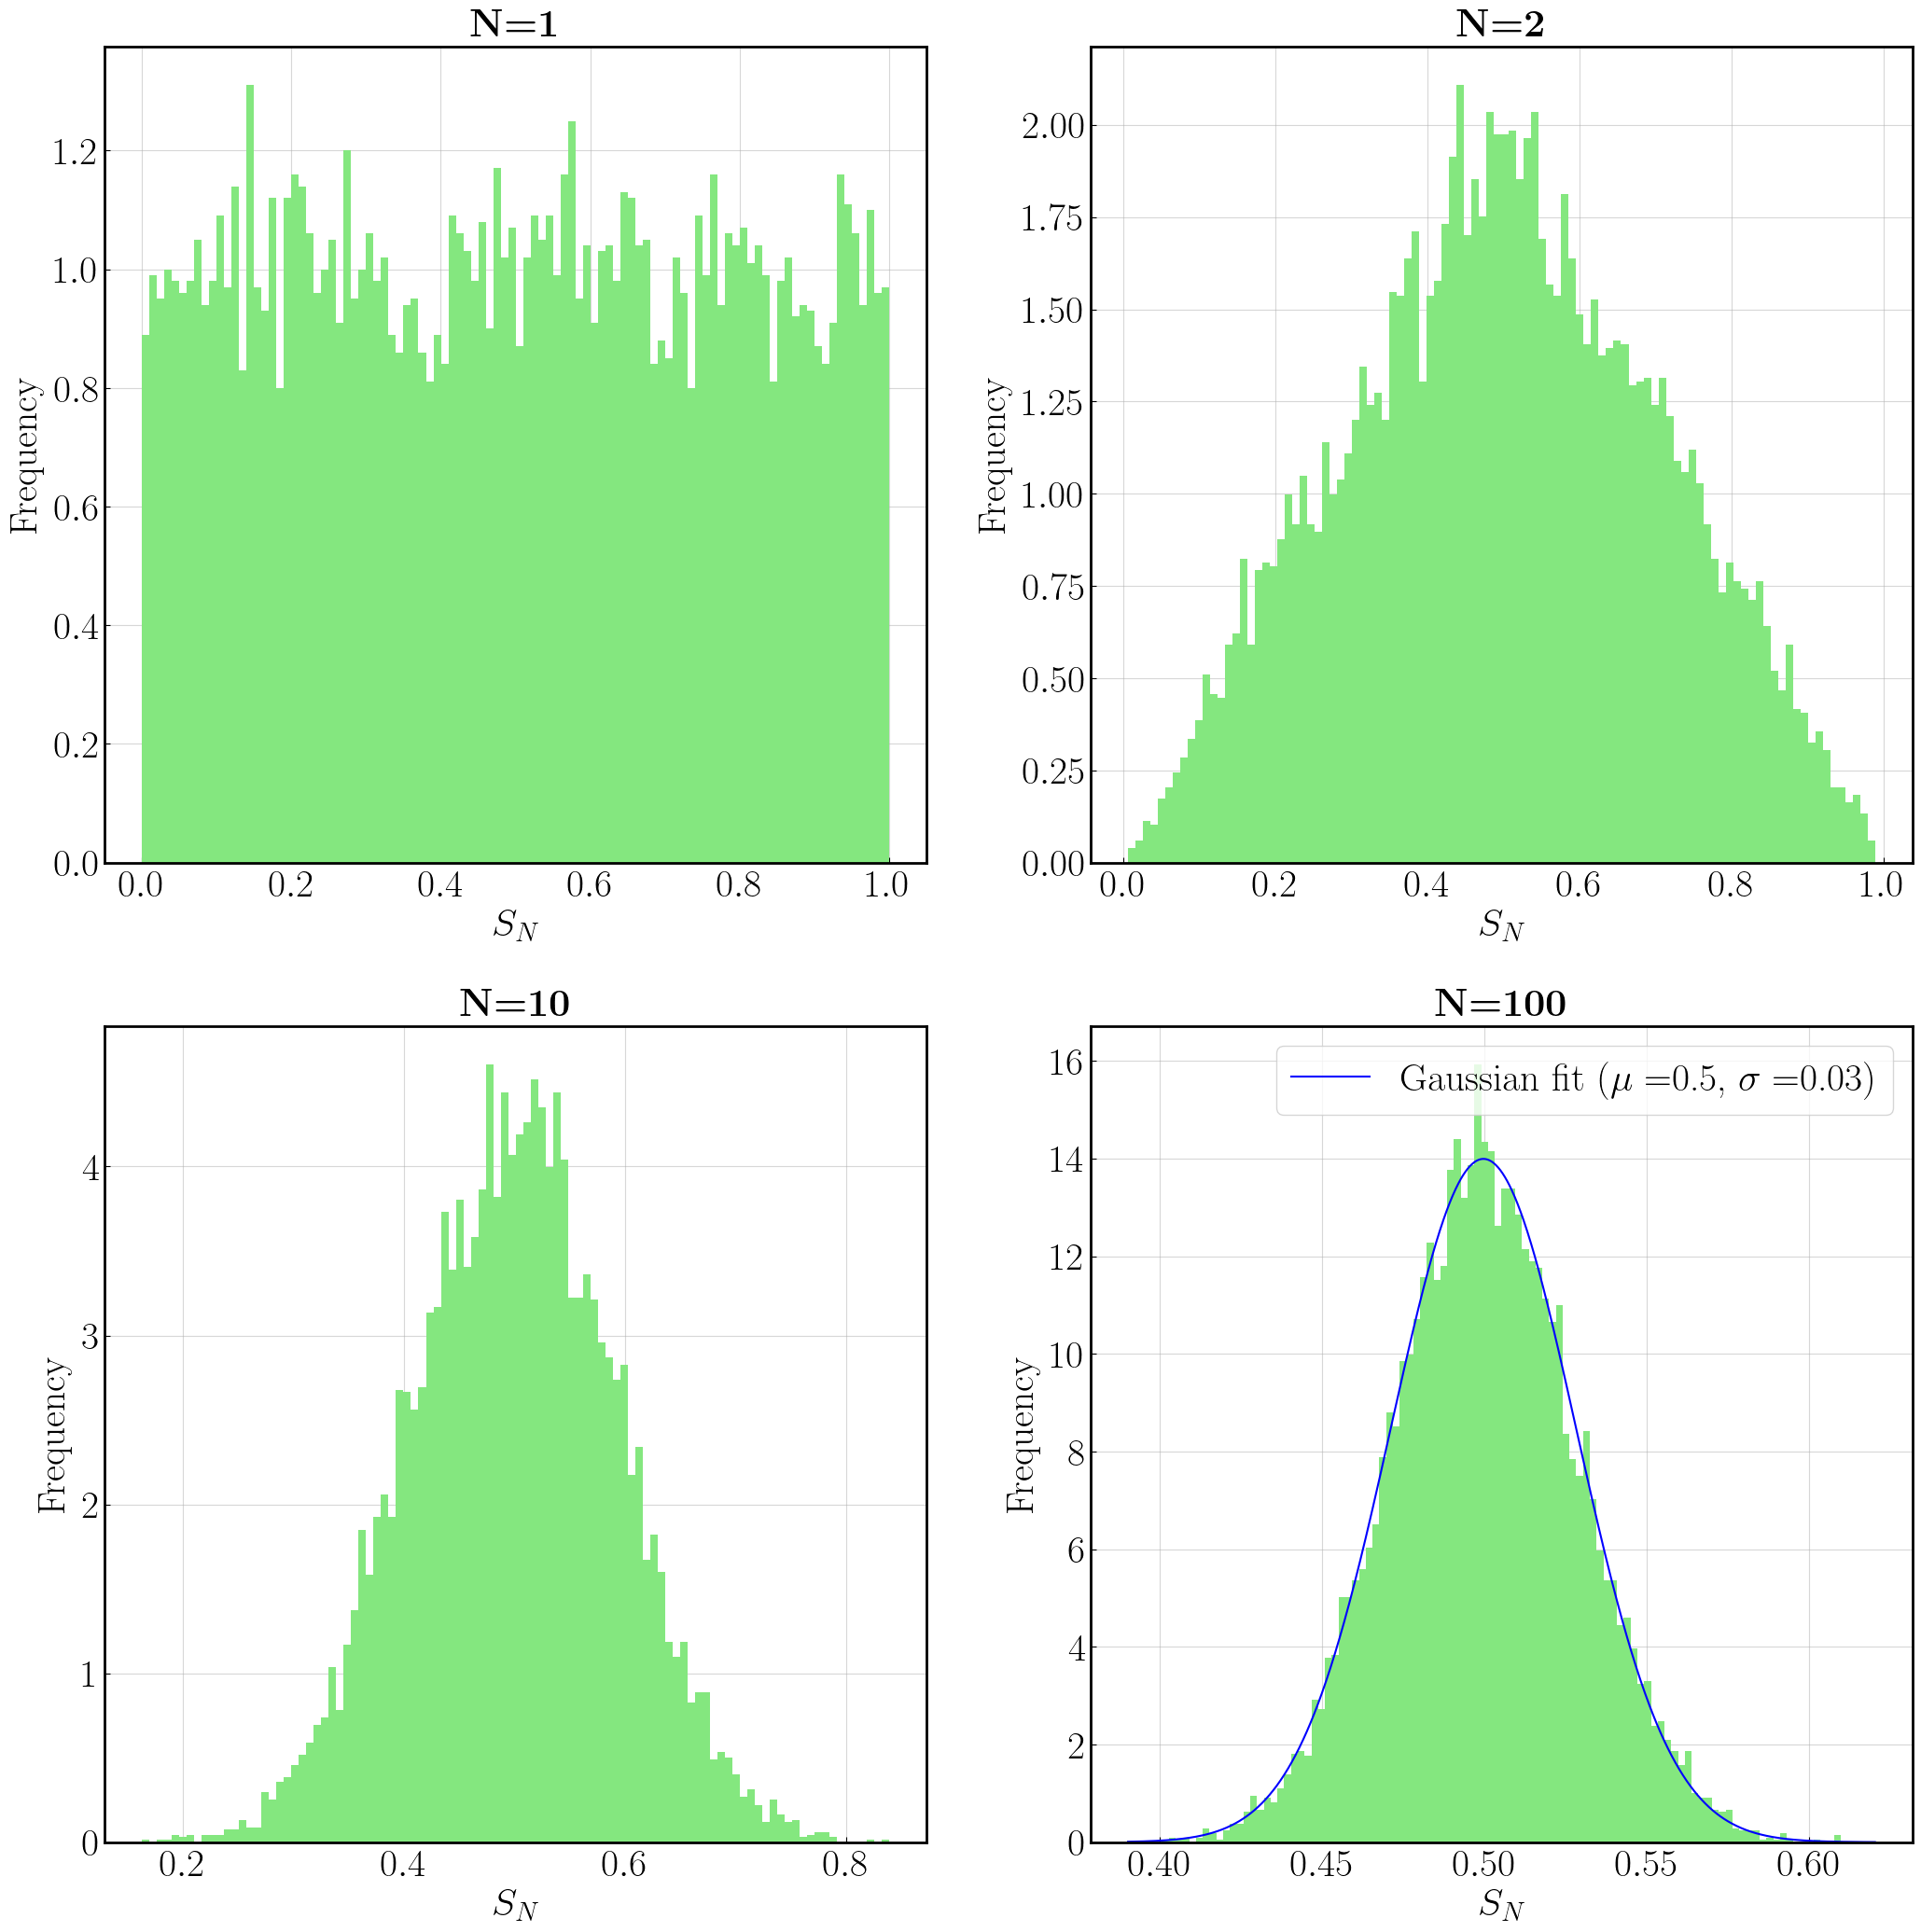

In [9]:
# plotting the hystograms

nbin = 100
color = '#84E77F'
size = 30

fig, axs = plt.subplots(2, 2, figsize=(25, 25))

axs[0,0].hist(unif[:10000,2], bins=nbin, color=color, density = True)
axs[0,0].set_title(r'\textbf{N=1}', fontsize=size, pad=8)

axs[0,1].hist(unif[10000:20000,2], bins=nbin, color=color, density = True)
axs[0,1].set_title(r'\textbf{N=2}', fontsize=size, pad=8)

axs[1,0].hist(unif[20000:30000,2], bins=nbin, color=color, density = True)
axs[1,0].set_title(r'\textbf{N=10}', fontsize=size, pad=8)

axs[1,1].hist(unif[30000:40000,2], bins=nbin, color=color, density = True)
axs[1,1].set_title(r'\textbf{N=100}', fontsize=size, pad=8)

for i in range(2) :
    for j in range(2) :
        axs[i,j].set_xlabel('$S_N$', fontsize=size)
        axs[i,j].set_ylabel('Frequency', fontsize=size, labelpad=8)
        axs[i,j].tick_params(axis='y', labelsize=size)
        axs[i,j].tick_params(axis='x', labelsize=size, pad=5)


# fit with a normal distribution

xlim = axs[1,1].get_xlim()
bins = np.linspace(xlim[0], xlim[1], 10001)
data_entries, bins = np.histogram(unif[30000:40000,2], bins = bins, density = True)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
popt, pcov = curve_fit(gauss_distr, binscenters, data_entries)
x = np.linspace(xlim[0], xlim[1], 1000)
y_fit = gauss_distr(x, *popt)

axs[1,1].plot(x, y_fit, color='blue', label='Gaussian fit ($\mu=$' + str(round(popt[0],2)) + ', $\sigma=$' + str(round(popt[1],2)) + ')')
axs[1,1].legend(fontsize=size)


plt.show()

### Exponential distribution

In [10]:
expo = np.loadtxt('01.2/exponential.csv', delimiter=',', skiprows=1)
expo = expo[np.argsort(expo[:,0])]

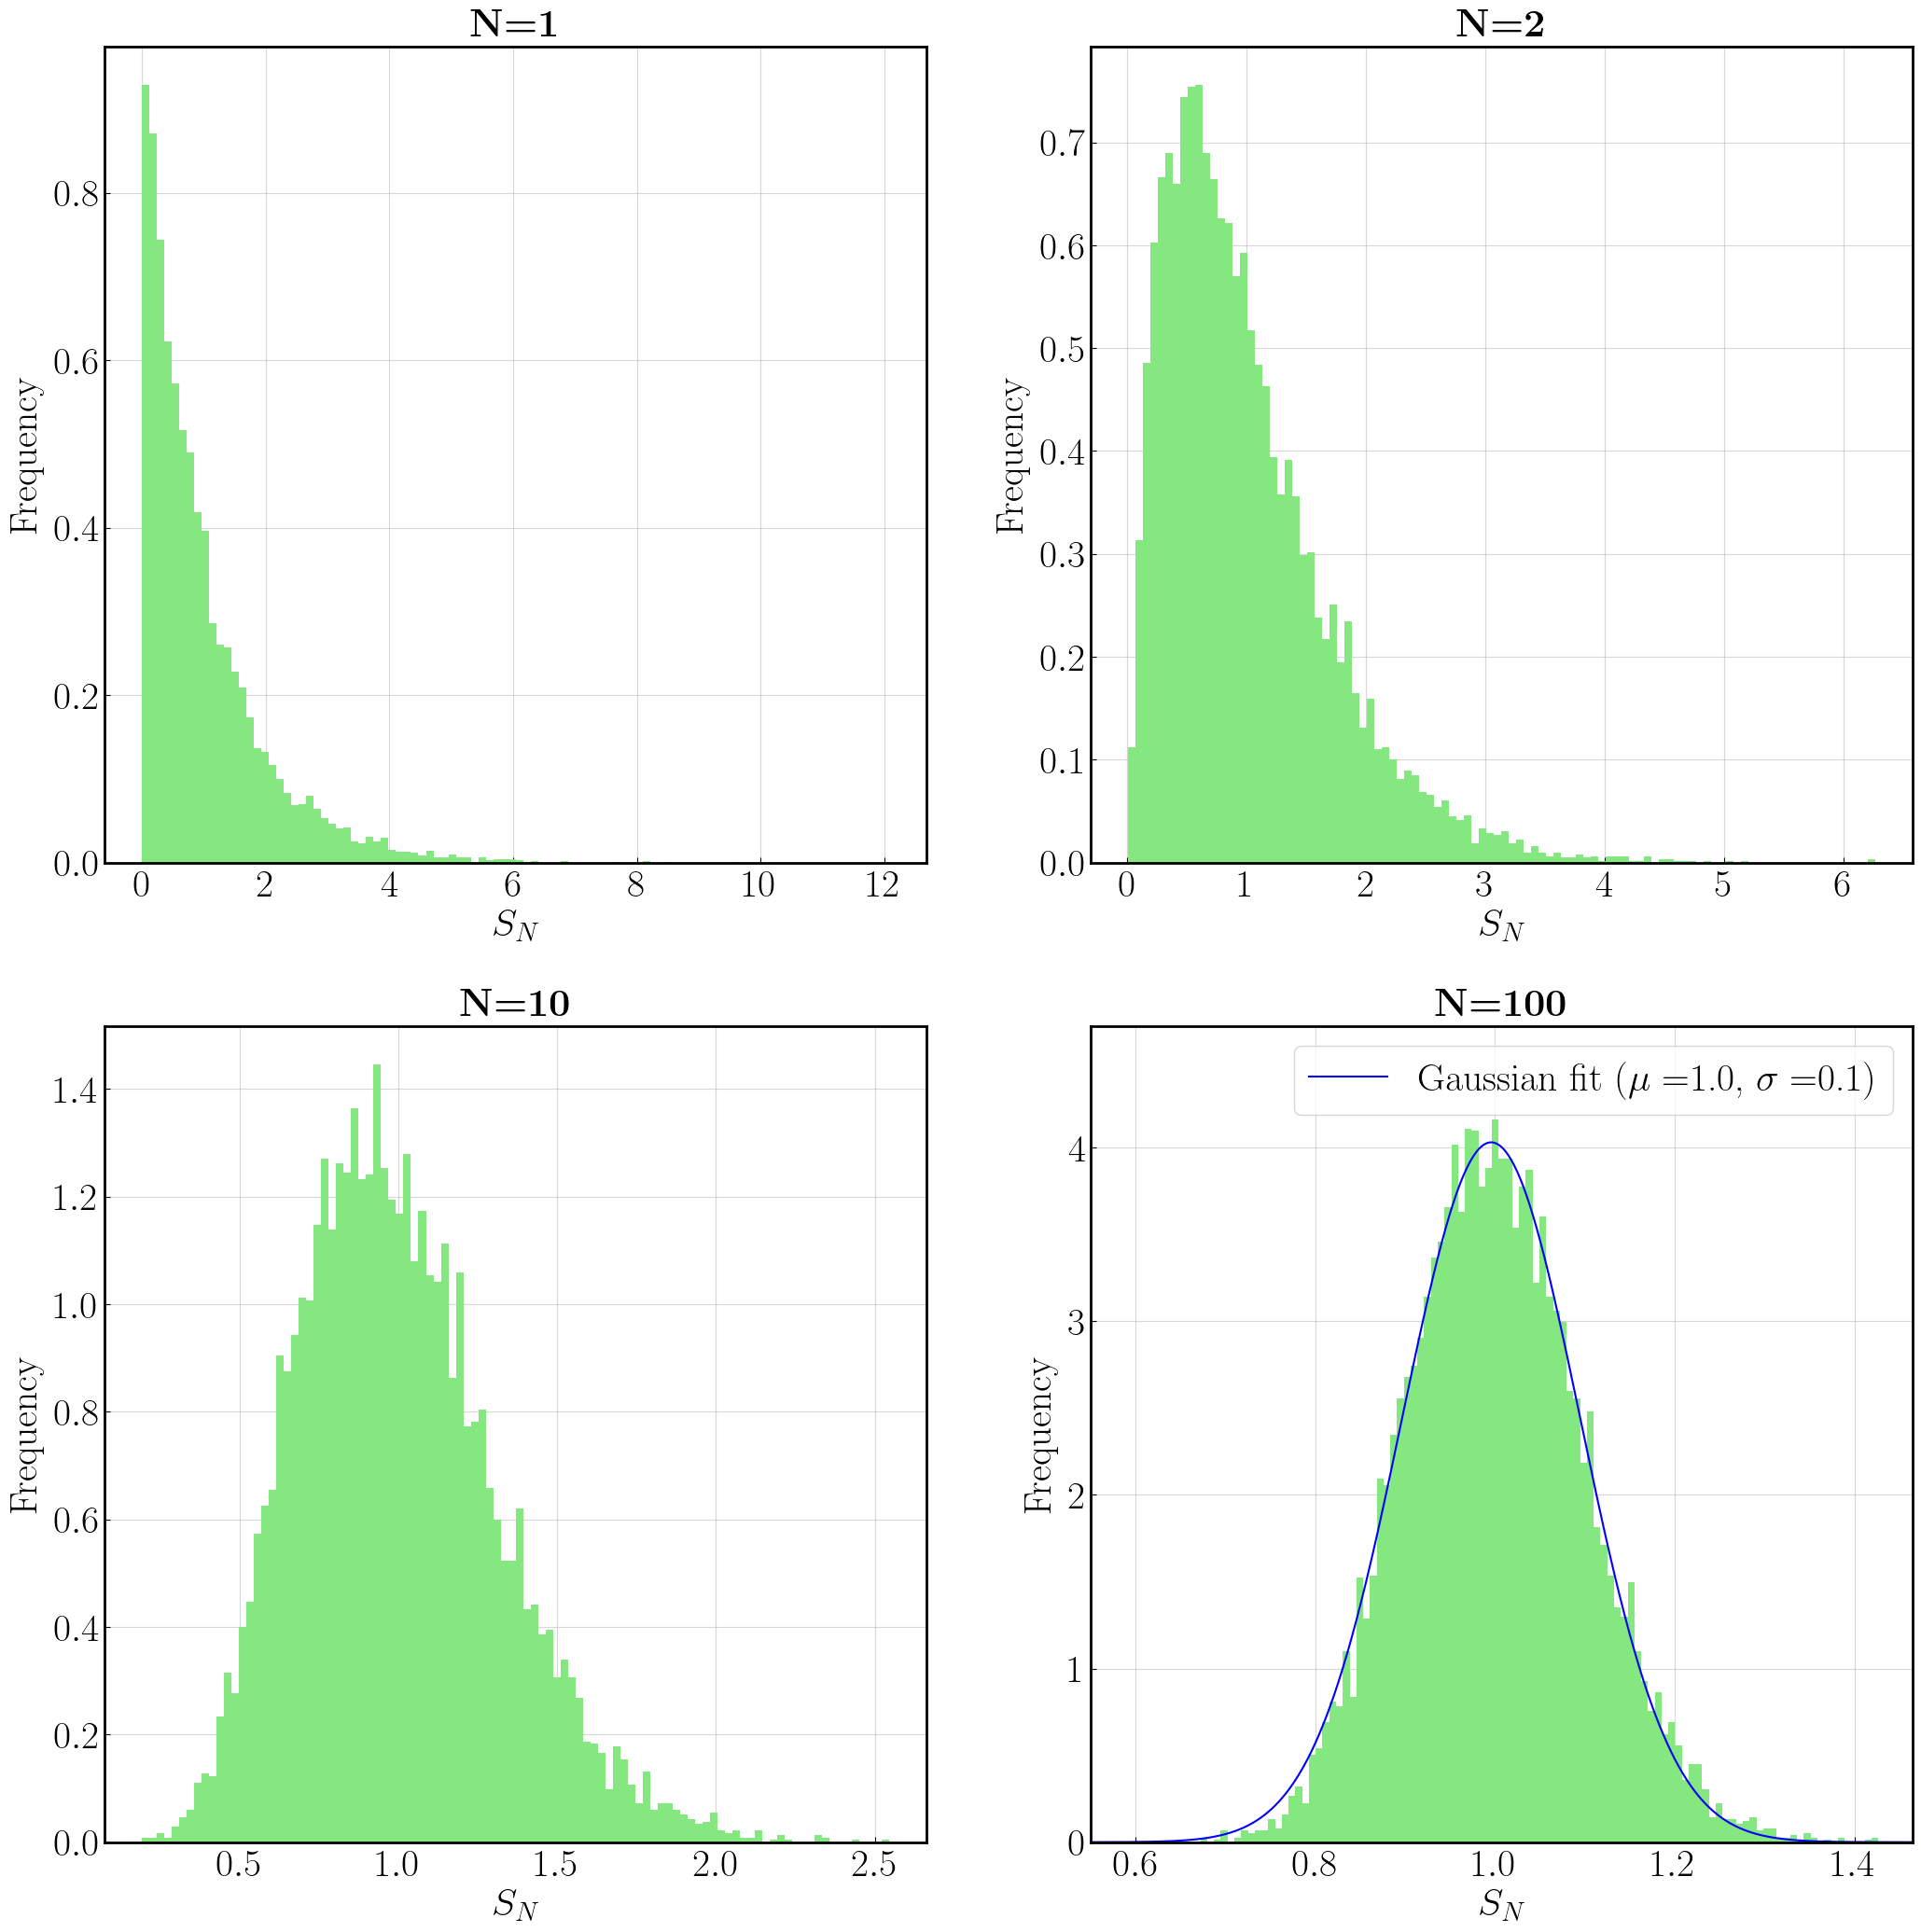

In [11]:
# plotting the hystograms

nbin = 100
color = '#84E77F'
size = 30

fig, axs = plt.subplots(2, 2, figsize=(25, 25))

axs[0,0].hist(expo[:10000,2], bins=nbin, color=color, density = True)
axs[0,0].set_title(r'\textbf{N=1}', fontsize=size, pad=8)

axs[0,1].hist(expo[10000:20000,2], bins=nbin, color=color, density = True)
axs[0,1].set_title(r'\textbf{N=2}', fontsize=size, pad=8)

axs[1,0].hist(expo[20000:30000,2], bins=nbin, color=color, density = True)
axs[1,0].set_title(r'\textbf{N=10}', fontsize=size, pad=8)

axs[1,1].hist(expo[30000:40000,2], bins=nbin, color=color, density = True)
axs[1,1].set_title(r'\textbf{N=100}', fontsize=size, pad=8)
axs[1,1].set_ylim(axs[1,1].get_ylim()[0], 4.7)
axs[1,1].set_xlim(0.55, axs[1,1].get_xlim()[1])

for i in range(2) :
    for j in range(2) :
        axs[i,j].set_xlabel('$S_N$', fontsize=size)
        axs[i,j].set_ylabel('Frequency', fontsize=size, labelpad=8)
        axs[i,j].tick_params(axis='y', labelsize=size)
        axs[i,j].tick_params(axis='x', labelsize=size, pad=5)


# fit with a normal distribution

xlim = axs[1,1].get_xlim()
bins = np.linspace(xlim[0], xlim[1], 10001)
data_entries, bins = np.histogram(expo[30000:40000,2], bins = bins, density = True)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
popt, pcov = curve_fit(gauss_distr, binscenters, data_entries)
x = np.linspace(xlim[0], xlim[1], 1000)
y_fit = gauss_distr(x, *popt)

axs[1,1].plot(x, y_fit, color='blue', label='Gaussian fit ($\mu=$' + str(round(popt[0],2)) + ', $\sigma=$' + str(round(popt[1],2)) + ')')
axs[1,1].legend(fontsize=size)


plt.show()

### Cauchy-Lorentz distribution

In [12]:
calo = np.loadtxt('01.2/cauchy-lorentz.csv', delimiter=',', skiprows=1)
calo = calo[np.argsort(calo[:,0])]

In [13]:
# definition of the fitting function

def cau_lor_distr(x, mu, gamma):
    return cauchy.pdf(x, mu, gamma)

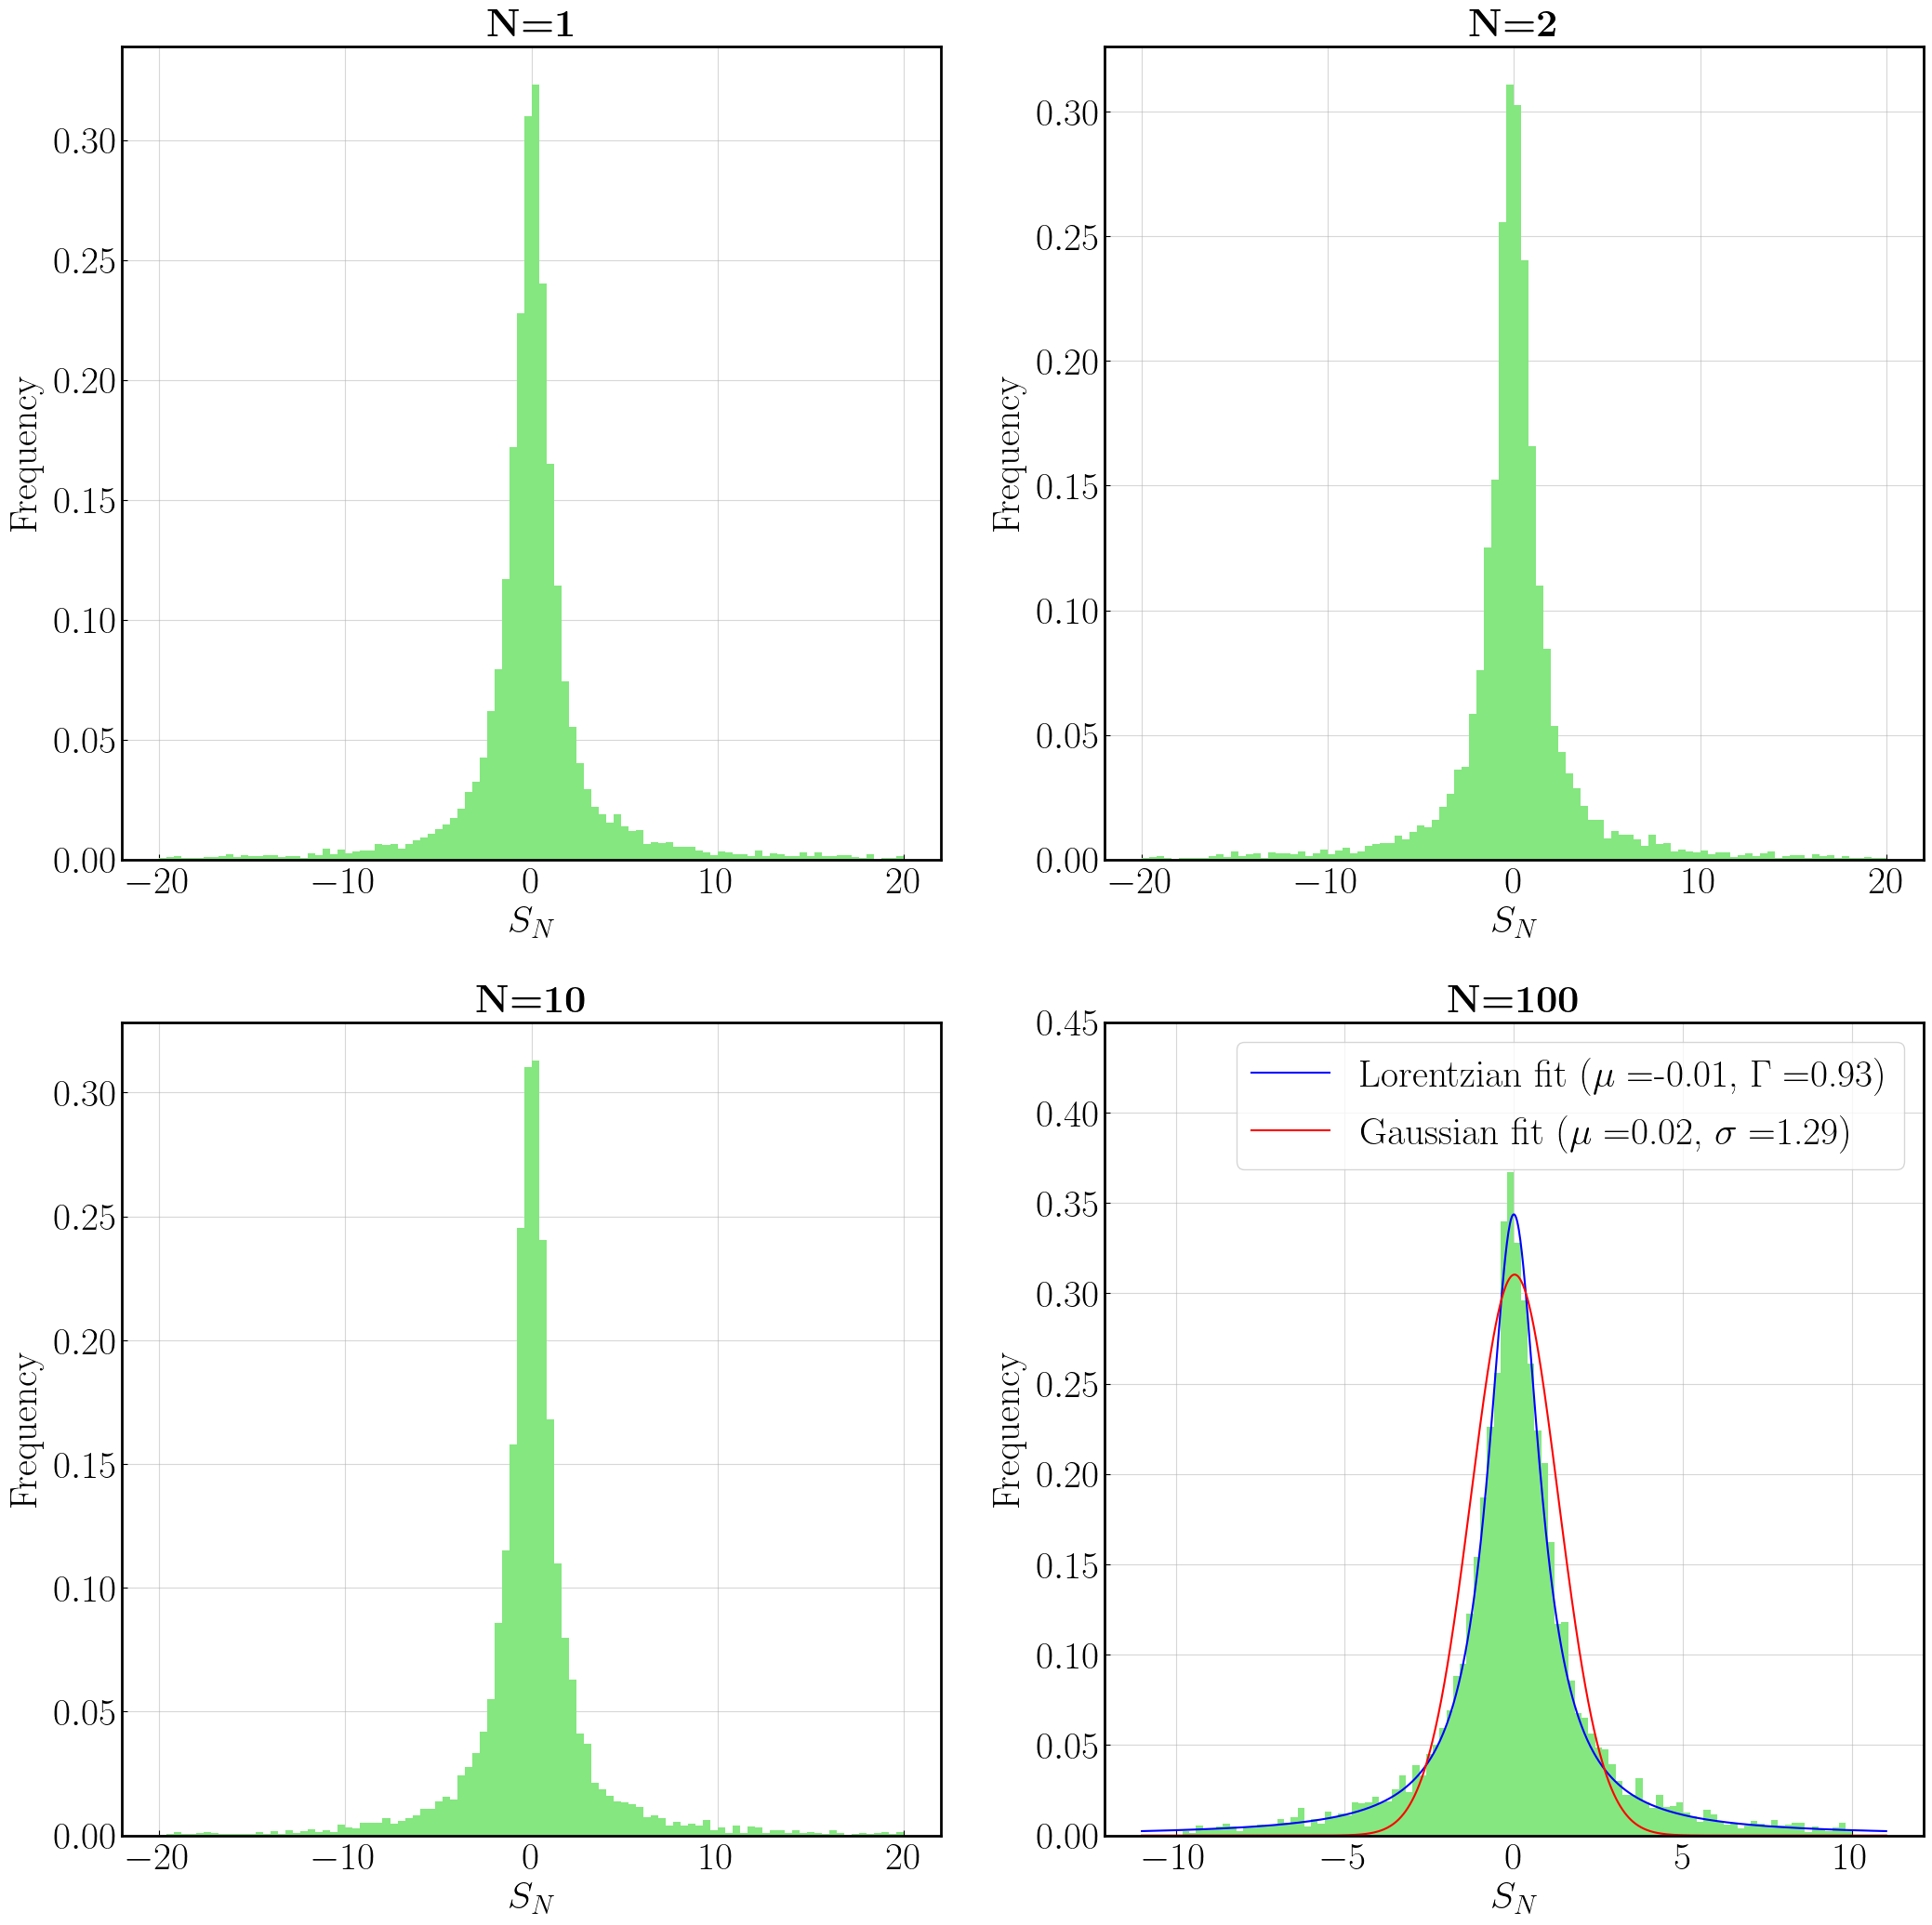

In [14]:
# plotting the hystograms

nbin = 100
color = '#84E77F'
size = 30

fig, axs = plt.subplots(2, 2, figsize=(25, 25))

axs[0,0].hist(calo[:10000,2], bins=nbin, color=color, density = True, range = (-20, 20))
axs[0,0].set_title(r'\textbf{N=1}', fontsize=size, pad=8)

axs[0,1].hist(calo[10000:20000,2], bins=nbin, color=color, density = True, range = (-20, 20))
axs[0,1].set_title(r'\textbf{N=2}', fontsize=size, pad=8)

axs[1,0].hist(calo[20000:30000,2], bins=nbin, color=color, density = True, range = (-20, 20))
axs[1,0].set_title(r'\textbf{N=10}', fontsize=size, pad=8)

axs[1,1].hist(calo[30000:40000,2], bins=nbin, color=color, density = True, range = (-10, 10))
axs[1,1].set_title(r'\textbf{N=100}', fontsize=size, pad=8)
axs[1,1].set_ylim(axs[1,1].get_ylim()[0], 0.45)

for i in range(2) :
    for j in range(2) :
        axs[i,j].set_xlabel('$S_N$', fontsize=size)
        axs[i,j].set_ylabel('Frequency', fontsize=size, labelpad=8)
        axs[i,j].tick_params(axis='y', labelsize=size)
        axs[i,j].tick_params(axis='x', labelsize=size, pad=5)


# fit with a normal distribution

xlim = axs[1,1].get_xlim()
bins = np.linspace(xlim[0], xlim[1], 10001)
data_entries, bins = np.histogram(calo[30000:40000,2], bins = bins, density = True)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
popt, pcov = curve_fit(cau_lor_distr, binscenters, data_entries)
popt2, pcov2 = curve_fit(gauss_distr, binscenters, data_entries)
x = np.linspace(xlim[0], xlim[1], 1000)
y_fit = cau_lor_distr(x, *popt)
y_fit2 = gauss_distr(x, *popt2)

axs[1,1].plot(x, y_fit, color='blue', label='Lorentzian fit ($\mu=$' + str(round(popt[0],2)) + ', $\Gamma=$' + str(round(popt[1],2)) + ')')
axs[1,1].plot(x, y_fit2, color='red', label='Gaussian fit ($\mu=$' + str(round(popt2[0],2)) + ', $\sigma=$' + str(round(popt2[1],2)) + ')')
axs[1,1].legend(fontsize=size)


plt.show()

## Exercise 01.3

**Buffon's experiment**

- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$. If possible, do not use $\pi$ to evaluate $\pi$.

### Solution

In [15]:
# loading the file
pi = np.loadtxt('01.3/pi.csv', delimiter=',', skiprows=1)

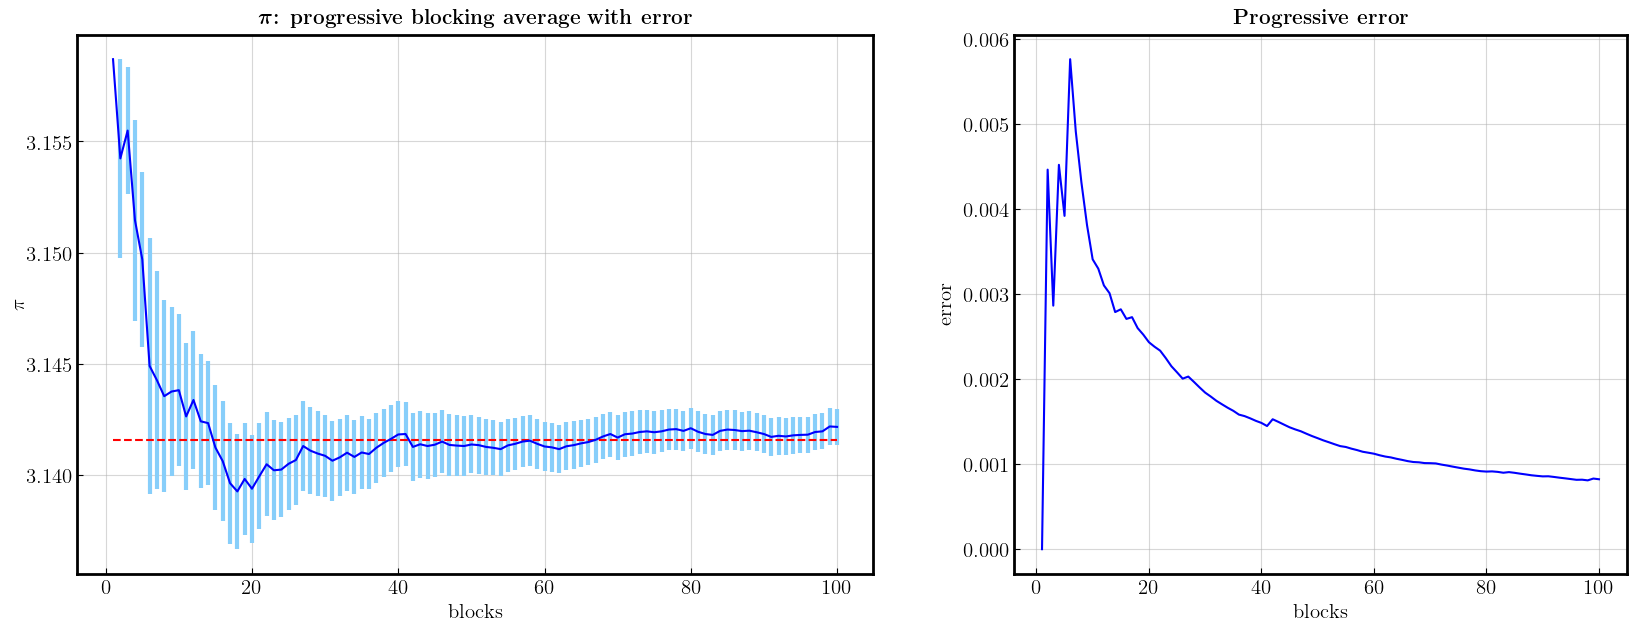

In [16]:
# plot pi value
fig, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={'width_ratios': [1.3, 1]})


axs[0].errorbar(pi[:,0], pi[:,2], yerr=pi[:,3], fmt='-', color='blue', ecolor='lightskyblue', elinewidth=3)
p = np.ones(pi.shape[0])*np.pi
axs[0].plot(pi[:,0], p, linestyle='--', color='red')

axs[0].set_title(r'\textbf{\boldmath $\pi$: progressive blocking average with error}', pad=8)
axs[0].set_xlabel('blocks')
axs[0].set_ylabel(r'$\pi$', labelpad=-2)

axs[1].plot(pi[:,0], pi[:,3], color='blue')
axs[1].set_title(r'\textbf{Progressive error}', pad=8)
axs[1].set_xlabel('blocks')
axs[1].set_ylabel('error', labelpad=6)

plt.show()